In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm
import sys
sys.path.append("../src/")
from logger import setup_logger, LOGGER
from trainer import train_lgbm
from util_tool import reduce_mem_usage
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
# ==================
# Constant
# ==================
TRAIN_PATH = "../input/train.csv"
TEST_PATH = "../input/test.csv"
USER_PATH = "../input/user_x_anime.csv"

In [3]:
# =====================
# Settings
# =====================
SAVE_PATH = "../output/fe/fe006_.feather"

In [4]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [5]:
cols = ["Aired"]
train = pd.concat([train[cols],test[cols]]).reset_index(drop=True)

In [6]:
def air_to_today(day):
    try:
        day = day.split("to")[0]
        day = pd.to_datetime(day)
        d = pd.to_datetime('2021-08-01') - day
        return d.days
    except:
        return np.nan

In [7]:
train["today_from_air"] = train["Aired"].map(air_to_today)

<AxesSubplot:>

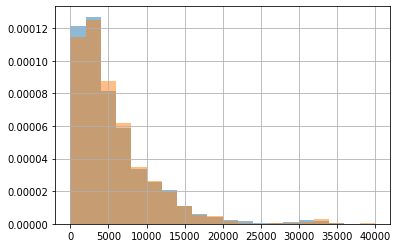

In [12]:
train.iloc[:-len(test)]["today_from_air"].hist(bins=20,range=(0,40000),density=True, alpha=0.5)
train.iloc[-len(test):]["today_from_air"].hist(bins=20,range=(0,40000),density=True, alpha=0.5)